In [147]:
import gzip
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import rockhound as rh
import verde as vd
import cmocean

## Plot global seismicity catalog

In [19]:
quakes = []
with gzip.open("../data/jan76_dec17.ndk.gz", "rt") as quake_file:
    for i, line in enumerate(quake_file):
        if i % 5 == 0:
            # The line looks like this:
            #   MLI  1976/01/01 01:29:39.6 -28.61 -177.64  59.0 6.2 0.0 KERMADEC ISLANDS REGION 
            parts = line.split()
            latitude, longitude, depth, magnitude = parts[3:7]
            quakes.append([latitude, longitude, depth, magnitude])
quakes = np.array(quakes, dtype="float32")

In [20]:
quakes

array([[ -28.61, -177.64,   59.  ,    6.2 ],
       [ -13.29,  -74.9 ,   95.  ,    6.  ],
       [  51.6 ,  159.33,   33.  ,    5.7 ],
       ...,
       [  -8.12,   68.06,   10.  ,    0.  ],
       [ -53.03, -118.35,   10.  ,    0.  ],
       [  17.86,  145.89,  156.6 ,    0.  ]], dtype=float32)

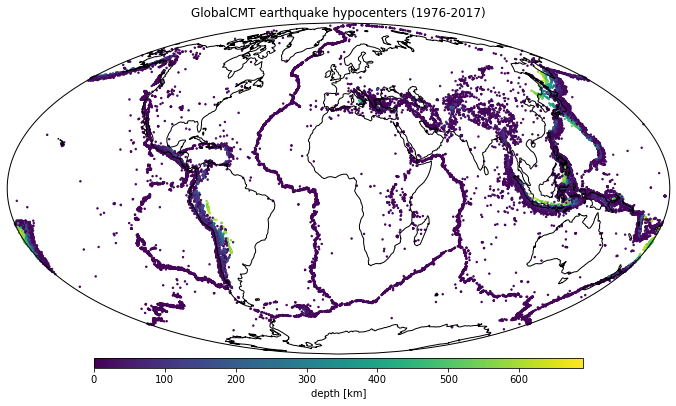

In [49]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_title("GlobalCMT earthquake hypocenters (1976-2017)")
tmp = ax.scatter(quakes[:, 1], quakes[:, 0], s=2, c=quakes[:, 2], transform=ccrs.PlateCarree())
plt.colorbar(tmp, label="depth [km]", orientation="horizontal", aspect=50, pad=0.01, shrink=0.7)
ax.coastlines()
plt.tight_layout()
plt.savefig("../slides/1-plate-tectonics/global-seismicity.png", dpi=200)
plt.show()

## Lithosphere age

In [63]:
grid = rh.fetch_seafloor_age()
print(grid)

<xarray.Dataset>
Dimensions:      (latitude: 1801, longitude: 3601)
Coordinates:
  * latitude     (latitude) float32 -90.0 -89.9 -89.8 -89.7 ... 89.8 89.9 90.0
  * longitude    (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Data variables:
    age          (latitude, longitude) float32 nan nan nan ... 55.42 55.42 55.42
    uncertainty  (latitude, longitude) float32 nan nan nan ... 15.0 15.0 15.0
Attributes:
    title:    Age of oceanic lithosphere
    doi:      10.1029/2007GC001743


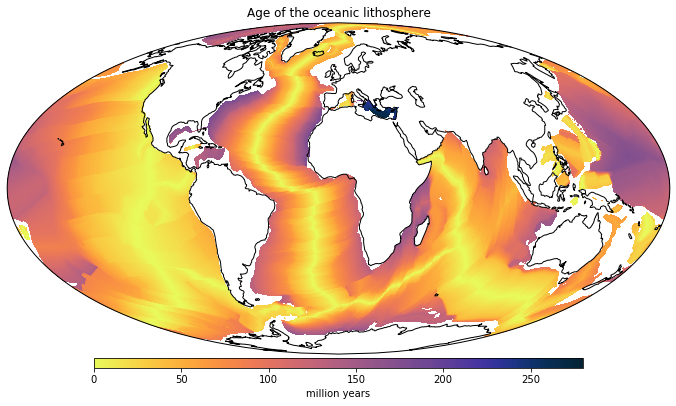

In [66]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_title("Age of the oceanic lithosphere")
tmp = ax.pcolormesh(
    grid.longitude, grid.latitude, grid.age.values, transform=ccrs.PlateCarree(), 
    cmap=cmocean.cm.thermal_r,
)
plt.colorbar(tmp, label="million years", orientation="horizontal", aspect=50, pad=0.01, shrink=0.7)
ax.coastlines()
plt.tight_layout()
plt.savefig("../slides/1-plate-tectonics/lithosphere-age.png", dpi=200)
plt.show()

## Earth Relief

In [44]:
topo = xr.open_dataarray("../data/earth_relief_10m.grd")
topo

<xarray.DataArray 'z' (lat: 1081, lon: 2161)>
[2336041 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.7 -179.5 ... 179.7 179.8 180.0
  * lat      (lat) float64 -90.0 -89.83 -89.67 -89.5 ... 89.5 89.67 89.83 90.0
Attributes:
    long_name:     elevation (m)
    actual_range:  [-10399.   6280.]

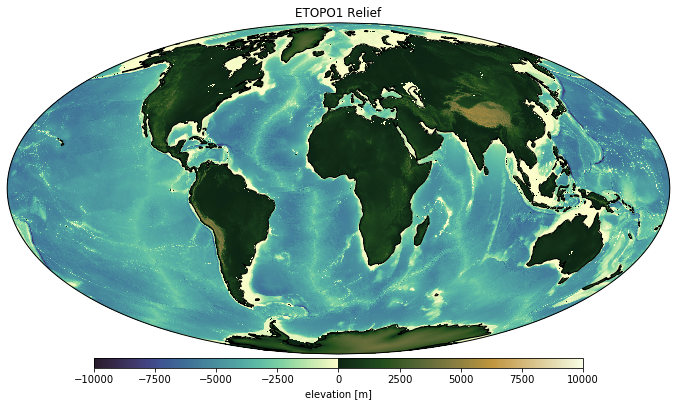

In [55]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_title("ETOPO1 Relief")
tmp = ax.pcolormesh(
    topo.lon, topo.lat, topo.values, transform=ccrs.PlateCarree(), 
    vmin=-10000, vmax=10000, cmap=cmocean.cm.topo
)
plt.colorbar(tmp, label="elevation [m]", orientation="horizontal", aspect=50, pad=0.01, shrink=0.7)
ax.coastlines()
plt.tight_layout()
plt.savefig("../slides/1-plate-tectonics/topography.png", dpi=200)
plt.show()

## GPS

In [99]:
gps = pd.read_csv("../data/pbo.final_igs14.vel", delim_whitespace=True, skiprows=35)
gps

,*Dot#,Name,Ref_epoch,Ref_jday,Ref_X,Ref_Y,Ref_Z,Ref_Nlat,Ref_Elong,Ref_Up...,...,dE/dt,dU/dt,SNd,SEd,SUd,Rne,Rnu,Reu,first_epoch,last_epoch
0,1LSU,Louisiana_St,20180912120000,58373.5,-1.134030e+05,-5.504361e+06,3.209404e+06,30.407425,268.819737,-6.57937,...,-0.01269,-0.00342,0.00021,0.00045,0.00060,0.010,0.054,-0.021,20030426000000,20080615000000
1,1LSU,Louisiana_St,20180912120000,58373.5,-1.134030e+05,-5.504361e+06,3.209404e+06,30.407425,268.819737,-6.58712,...,-0.01269,-0.00342,0.00021,0.00045,0.00060,0.010,0.054,-0.021,20080628000000,20100411000000
2,1LSU,Louisiana_St,20180912120000,58373.5,-1.134030e+05,-5.504361e+06,3.209404e+06,30.407425,268.819737,-6.59651,...,-0.01269,-0.00342,0.00021,0.00045,0.00060,0.010,0.054,-0.021,20100417000000,20140112000000
3,1LSU,Louisiana_St,20180912120000,58373.5,-1.134030e+05,-5.504361e+06,3.209404e+06,30.407425,268.819737,-6.58838,...,-0.01269,-0.00342,0.00021,0.00045,0.00060,0.010,0.054,-0.021,20140118000000,20180624000000
4,1LSU,Louisiana_St,20180912120000,58373.5,-1.134030e+05,-5.504361e+06,3.209404e+06,30.407425,268.819737,-6.58360,...,-0.01269,-0.00342,0.00021,0.00045,0.00060,0.010,0.054,-0.021,20180630000000,20180915000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,ZSE1,Seattle_WAAS_1,20180912120000,58373.5,-2.308930e+06,-3.668169e+06,4.663526e+06,47.286993,237.811626,81.62398,...,-0.01000,-0.00251,0.00016,0.00012,0.00038,0.004,-0.008,-0.004,20030419000000,20070513000000
6052,ZSE1,Seattle_WAAS_1,20180912120000,58373.5,-2.308930e+06,-3.668169e+06,4.663526e+06,47.286993,237.811627,81.63725,...,-0.01000,-0.00251,0.00016,0.00012,0.00038,0.004,-0.008,-0.004,20070519000000,20180915000000
6053,ZTL4,Atlanta_WAAS_4,20180912120000,58373.5,5.298403e+05,-5.305248e+06,3.489343e+06,33.379689,275.703273,260.64896,...,-0.01339,-0.00062,0.00009,0.00006,0.00021,0.026,0.034,-0.075,20021109000000,20030427000000
6054,ZTL4,Atlanta_WAAS_4,20180912120000,58373.5,5.298403e+05,-5.305248e+06,3.489343e+06,33.379689,275.703273,260.67807,...,-0.01339,-0.00062,0.00009,0.00006,0.00021,0.026,0.034,-0.074,20030503000000,20061203000000


In [185]:
blockfilter = vd.BlockReduce(np.median, spacing=0.8)

In [210]:
filt_coords, filt_vel = blockfilter.filter(
    (gps.Ref_Elong.values, gps.Ref_Nlat.values), 
    (gps["dE/dt"].values, gps["dN/dt"].values)
)

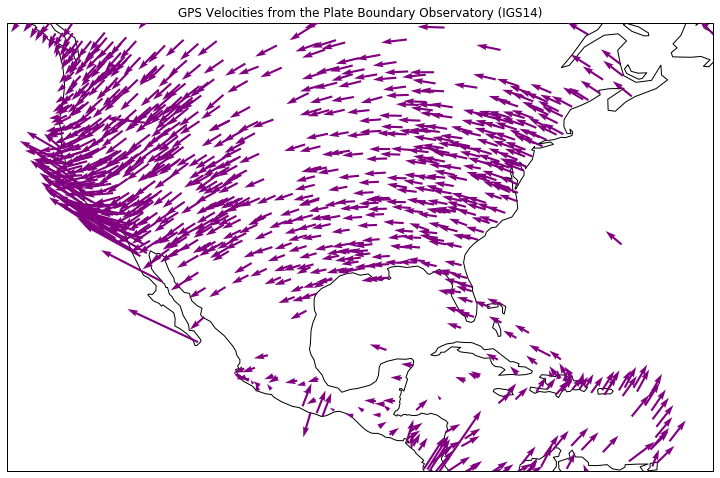

In [211]:
plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_title("GPS Velocities from the Plate Boundary Observatory (IGS14)")
ax.coastlines()
tmp = ax.quiver(
    *filt_coords, *filt_vel, transform=ccrs.PlateCarree(),
    scale=0.5, width=0.003, color="purple", zorder=1000
)
ax.set_extent([-130, -55, 10, 50], crs=ccrs.PlateCarree())

plt.subplots_adjust(top = 1, bottom = 0, right = 0.99, left = 0.01, 
            hspace = 0, wspace = 0)
plt.savefig("../slides/1-plate-tectonics/gps-igs14.png", dpi=200)
plt.show()

In [193]:
gps_nam = pd.read_csv("../data/pbo.final_nam14.vel", delim_whitespace=True, skiprows=35)
gps_nam

,*Dot#,Name,Ref_epoch,Ref_jday,Ref_X,Ref_Y,Ref_Z,Ref_Nlat,Ref_Elong,Ref_Up...,...,dE/dt,dU/dt,SNd,SEd,SUd,Rne,Rnu,Reu,first_epoch,last_epoch
0,1LSU,Louisiana_St,20180912120000,58373.5,-1.134029e+05,-5.504361e+06,3.209404e+06,30.407425,268.819738,-6.57941,...,-0.00017,-0.00346,0.00021,0.00045,0.00060,0.011,0.053,-0.021,20030426000000,20080615000000
1,1LSU,Louisiana_St,20180912120000,58373.5,-1.134029e+05,-5.504361e+06,3.209404e+06,30.407425,268.819738,-6.58716,...,-0.00017,-0.00346,0.00021,0.00045,0.00060,0.011,0.053,-0.021,20080628000000,20100411000000
2,1LSU,Louisiana_St,20180912120000,58373.5,-1.134029e+05,-5.504361e+06,3.209404e+06,30.407425,268.819738,-6.59654,...,-0.00017,-0.00346,0.00021,0.00045,0.00060,0.011,0.053,-0.021,20100417000000,20140112000000
3,1LSU,Louisiana_St,20180912120000,58373.5,-1.134029e+05,-5.504361e+06,3.209404e+06,30.407425,268.819738,-6.58841,...,-0.00017,-0.00346,0.00021,0.00045,0.00060,0.011,0.053,-0.021,20140118000000,20180624000000
4,1LSU,Louisiana_St,20180912120000,58373.5,-1.134029e+05,-5.504361e+06,3.209404e+06,30.407425,268.819738,-6.58364,...,-0.00017,-0.00346,0.00021,0.00045,0.00060,0.011,0.053,-0.021,20180630000000,20180915000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,ZSE1,Seattle_WAAS_1,20180912120000,58373.5,-2.308930e+06,-3.668169e+06,4.663526e+06,47.286994,237.811628,81.62577,...,0.00445,-0.00214,0.00016,0.00012,0.00038,0.005,-0.008,-0.005,20030419000000,20070513000000
6052,ZSE1,Seattle_WAAS_1,20180912120000,58373.5,-2.308930e+06,-3.668169e+06,4.663526e+06,47.286994,237.811628,81.63904,...,0.00445,-0.00214,0.00016,0.00012,0.00038,0.005,-0.008,-0.005,20070519000000,20180915000000
6053,ZTL4,Atlanta_WAAS_4,20180912120000,58373.5,5.298404e+05,-5.305248e+06,3.489343e+06,33.379689,275.703274,260.64826,...,0.00000,-0.00065,0.00009,0.00006,0.00021,0.029,0.039,-0.087,20021109000000,20030427000000
6054,ZTL4,Atlanta_WAAS_4,20180912120000,58373.5,5.298404e+05,-5.305248e+06,3.489343e+06,33.379689,275.703274,260.67736,...,0.00000,-0.00065,0.00009,0.00006,0.00021,0.029,0.039,-0.086,20030503000000,20061203000000


In [194]:
filt_coords, filt_vel = blockfilter.filter(
    (gps_nam.Ref_Elong.values, gps_nam.Ref_Nlat.values), 
    (gps_nam["dE/dt"].values, gps_nam["dN/dt"].values)
)

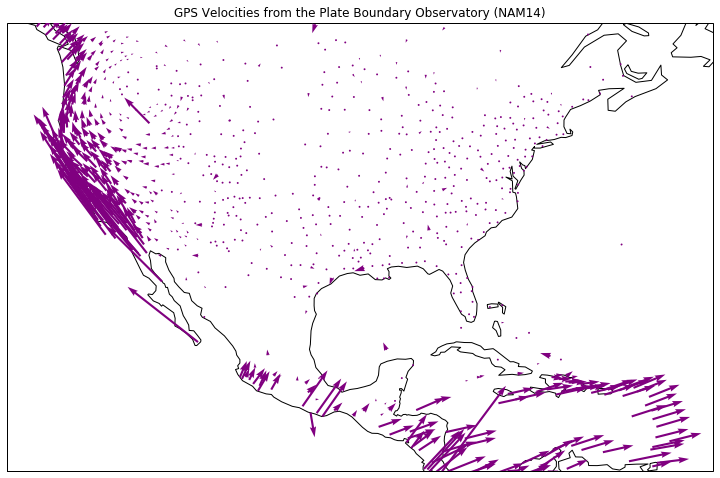

In [209]:
plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_title("GPS Velocities from the Plate Boundary Observatory (NAM14)")
ax.coastlines()
tmp = ax.quiver(
    *filt_coords, *filt_vel, transform=ccrs.PlateCarree(),
    scale=0.4, width=0.003, color="purple", zorder=1000
)
ax.set_extent([-130, -55, 10, 50], crs=ccrs.PlateCarree())
plt.subplots_adjust(top = 1, bottom = 0, right = 0.99, left = 0.01, 
            hspace = 0, wspace = 0)
plt.savefig("../slides/1-plate-tectonics/gps-nam14.png", dpi=200)
plt.show()